# Let's start doing some Neural Networks


#### Libraries:
As a starter we will install **TensorFlow**, and then **Keras** on top of it.

Keras is a high-level Deep Learning API that can work with TensorFlow, Theano, and other lower-level Deep Learning libraries underneath. Keras simply allows us to define our ANN with a few lines of code.

The benefit of using Keras is that our code will be super simple; and the inconvenience is that we will lose some flexibility. To have full flexbility we would have to use TensorFlow, or directly code our ANN if we are brave enough! (you can find YouTubers that do it).

Anybody that is serious in the world of Deep Learning uses Keras - at least to create benchmark ANNs and then tune them in a lower-level library. You can check the top [Kaggle competitions](https://www.kaggle.com/competitions) to verify that.


#### Now comes the hype:

If you are lucky enough to have a **top-spec NVIDIA GPU** in your machine: _Release the Cracken!_. Your Deep Learning models will fly (much faster training, optimisation, etc). This is because the latest `pip install tensorflor keras` include support for CUDA-enabled GPU cards.

Then, you can check if TensorFlow is detecting your GPU using these two lines of code:
```
import tensorflow as tf
tf.config.list_physical_devices('GPU')
```

If you had more than one GPU, Keras would also run them in parallel. You can see now what the guys at Amazon, Apple, Google, Facebook, etc are playing with these days :)

----

**NOTE:** Sklearn also has Deep Learning in it, more concretely are Multi-Layer Perceptron (MLP) classifier and a regressor. However I want to show you more advanced libraries and remove a bit our dependency on Sklearn, which you already should dominate after previous courses in this programme. 

In Deep Learning job applications however, you will be much more likely to see the words "Keras" and "Tensorflow" included in it rather than "Sklearn"

In [1]:
!pip install tensorflow keras

### Data:

Just as we did in the Introduction to Machine Learning course, we will start by using the most standard dataset. In supervised classification it was the Iris Dataset, and here is the MNIST dataset.

This dataset consists of a training set of 60k images of hand-written digits. The digits are from 0 to 9. So our target feature has 10 classes. Additionally, it comes with a testing set of another 10k images.

Each image is a 28x28 pixels, greyscale one. Each pixel has a value between 0 and 255 that represents how dark or clear the value of that pixel is.

In [2]:
from keras.datasets import mnist 

import matplotlib.pyplot as plt

In [3]:
'''
train_X is our input features' training data, train_y is our training
target feature. And the same for the test_* case.
'''

(train_X, train_y), (test_X, test_y) = mnist.load_data()

'''
If this last line of code doesn't work, run this:

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

'''

"\nIf this last line of code doesn't work, run this:\n\nimport ssl\nssl._create_default_https_context = ssl._create_unverified_context\n\n"

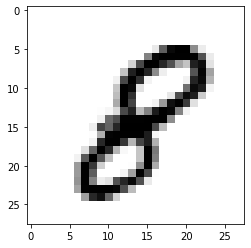

In [4]:
'''
Insert any number between 0 and 60k to visualise one training data
record. I put 4357 for example. BUT TRY SOME OTHER:
'''
SAMPLE_RECORD_NUMBER = 4357

sample = train_X[SAMPLE_RECORD_NUMBER]
plt.imshow(sample, cmap=plt.cm.binary)
plt.show()

In [5]:
'''
Our class is:
'''
train_y

# NOTE: All of the arrays and matrices you will see are Numpy arrays.

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
'''
And the element in the position we plotted above should be the same as
the one we visually recognised in the image:
'''
print('The class label in position', SAMPLE_RECORD_NUMBER,'is:', train_y[SAMPLE_RECORD_NUMBER])

The class label in position 4357 is: 8


The sample number 45 has the class 9
And this is the image:


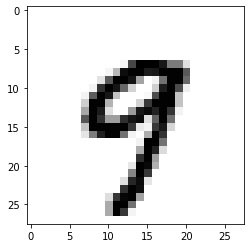

The sample number 534 has the class 6
And this is the image:


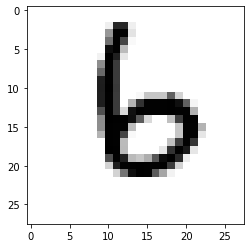

The sample number 6754 has the class 3
And this is the image:


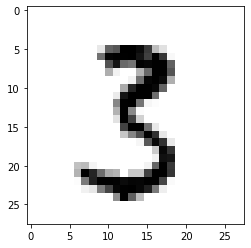

The sample number 34232 has the class 7
And this is the image:


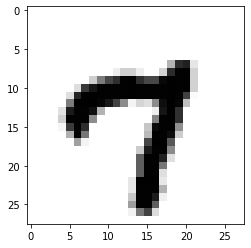

In [7]:
'''LET'S CHECK SOME MORE TRAINING SAMPLES: '''

CHECK_SAMPLES = [45, 534, 6754, 34232]

for s in CHECK_SAMPLES:
    print('The sample number', s, 'has the class', train_y[s])
    sample = train_X[s]
    plt.imshow(sample, cmap=plt.cm.binary)
    print('And this is the image:')
    plt.show()

### It's an 8!

For us humans it is easy to understand that it is the number 8 (or any other digit shown up there). But can we build an ANN that can classify this image and return to us the number 8? 

**But first of all:**
What are our input features?

In [8]:
train_X.shape

(60000, 28, 28)

We can see that our training data is 3-dimensional: 60k pictures, and each one of them is a matrix of 28x28 pixels.

Then, it would be natural if our input layer has 28x28=784 neurons.

_Yes, our data has 784 input features!_. This would be something crazy for any of the supervised classification models we saw in the Introduction of Machine Learning course.

All of the input features are integer numbers between 0 and 255. More concretely, 8-bit unsigned integers:

In [9]:
train_X.dtype

dtype('uint8')

## Hello World Deep Learning:

#### 5 STEPS:
1. We define the structure of our ANN
2. We "compile" the ANN with a cost function (cross-entropy is good as we saw in the slides), an optimisation algorithm (SGD), and a performance metric (accuracy, recall, AUC, etc).
3. We prepare and reshape the dataset
4. We fit the compiled model to our dataset
5. We evaluate our model using the test data

In [10]:
# STEP 1

from keras import layers, models

# This is a Deep Feedforward Neural Net like we saw in the slides
myfirstANN = models.Sequential() 

# We now add layers. We do not need to add the input layer.
# So we are just adding one hidden layer and then the output layer.
'''
In the hidden layer, we want to reduce the 784 features to something
smaller (reduce the complexity of the images), but not too small (so we
don't lose too much information too suddenly). A multiple of two always
helps the computation time (in both CPUs and GPUs).
'''
HIDDEN_NEURONS = 512

# (check the slides to make sense of these lines of code)
myfirstANN.add(
    layers.Dense(HIDDEN_NEURONS, 
                 activation='relu', 
                 input_shape=(28*28, ) # It's good to specify the input: a vector of 784 values (28*28)
                )
)

myfirstANN.add(
    layers.Dense(10, # We have 10 classes, so 10 output neurons 
                 activation='softmax'
    )
)

In [11]:
# STEP 2

# You can also try 'SGD' for Stochastic Gradient Descent as optimizer, but it doesn't perform that well. 
# We will see more optimisers, like this 'rmsprop' one, later in the course.
# But just for you to know: 'rmsprop' is a variant of SGD with some additional properties.
myfirstANN.compile(
    optimizer='rmsprop', 
    loss='categorical_crossentropy',
    metrics=['accuracy'] # We could add more metrics
)

In [12]:
# STEP 3

# From a 60000*28*28 (3D), we make it 60000*784 (2D)
processed_train_X = train_X.reshape((60000, 28*28))

# We will also normalise the values in [0, 1], instead of [0, 255]:
processed_train_X = processed_train_X.astype('float32') / 255

# And the same for the test data:
processed_test_X = test_X.reshape((10000, 28*28))
processed_test_X = processed_test_X.astype('float32') / 255

# We will explicitly make our target features categorical.
# Because they are numbers, the ANN might get confused and perform some
# regression if we don't do this.
from keras.utils import to_categorical

processed_train_y = to_categorical(train_y)
processed_test_y = to_categorical(test_y)

In [13]:
# STEP 4 - THE FUN

# We will see what the batch_size is for later in the course. 
# But in short this helps us just selecting some of the training data each time we run a gradient-descent iteration

# NUM ITERATIONS FOR GRADIENT DESCENT:
num_iter = 10

# This method is very similar as those of Sklearn:
myfirstANN.fit(processed_train_X, processed_train_y, epochs=num_iter, batch_size=128)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2583 - accuracy: 0.9244
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1047 - accuracy: 0.9691
Epoch 3/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0699 - accuracy: 0.9790
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0513 - accuracy: 0.9844
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0381 - accuracy: 0.9887
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0291 - accuracy: 0.9913
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0224 - accuracy: 0.9933
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0167 - accuracy: 0.9951
Epoch 9/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0135 - accuracy: 0.9962
Epoch 10/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0103 - accuracy: 0.9972

**While it runs**, let's analyse what is happening there:

In each iteration, our loss function should have become smaller, and probably our accuracy go higher and higher: _You have just seen your gradient-based optimisation process with backpropagation in action!_

If you run this last code cell again, you will see your loss becoming smaller and your accuracy becoming larger (if possible). This is because if you run fit again, you will run the optimisation process with your latest values, so it will be like just running more iterations (epochs) on top of your last model.

As a learning exercise you can try to fit a RandomForest and/or a SVM model to this data, and see what kind of accuracy you will be getting.

In [14]:
# STEP 5

test_loss, test_acc = myfirstANN.evaluate(processed_test_X, processed_test_y)
print('Accuracy in the testing data:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0763 - accuracy: 0.9801
Accuracy in the testing data: 0.9800999760627747


The difference in accuracies between the training data and the testing data represents how overfit your model is. The greater the difference, usually with testing accuracy lower, the more _overfit just to work with the training data_ your model is. 

My testing accuracy is 0.9821, while my training is 0.9961. My model is slightly overfit (maybe running less epochs will help).

In [15]:
# For any lower-level stuff we will need TensorFlow (or could have used Sklearn in this case)
# Because we want to display the confusion matrix:
import tensorflow as tf
import numpy as np

In [16]:
pred_classes = np.argmax(myfirstANN.predict(processed_test_X), axis=-1) # Take the neuron with the highest softmax probability

test_classes = np.argmax(processed_test_y, axis=-1) # The same...

In [17]:
conf_mat = tf.math.confusion_matrix(labels=test_classes, predictions=pred_classes)

In [18]:
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    0,    0,    2,    0,    2,    2,    4,    1],
       [   0, 1126,    3,    1,    0,    1,    2,    0,    2,    0],
       [   1,    2, 1003,    5,    3,    0,    2,    6,    9,    1],
       [   0,    0,    0,  994,    0,    4,    0,    3,    5,    4],
       [   1,    0,    2,    1,  966,    0,    2,    2,    0,    8],
       [   2,    0,    0,    4,    1,  874,    3,    0,    6,    2],
       [   4,    2,    0,    1,   13,    4,  929,    0,    5,    0],
       [   0,    4,    8,    4,    1,    0,    0, 1001,    4,    6],
       [   2,    0,    1,    3,    4,    2,    0,    2,  956,    4],
       [   1,    2,    0,    5,    7,    2,    0,    5,    4,  983]],
      dtype=int32)>

The real number was 4 and we predicted 9
And this is the image:


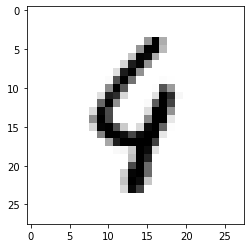

--------------------------------------------------
The real number was 2 and we predicted 8
And this is the image:


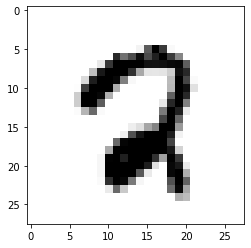

--------------------------------------------------
The real number was 2 and we predicted 9
And this is the image:


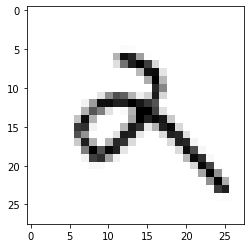

--------------------------------------------------
The real number was 9 and we predicted 8
And this is the image:


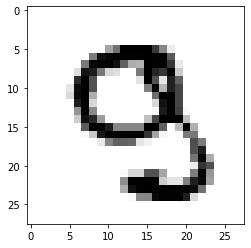

--------------------------------------------------
The real number was 4 and we predicted 2
And this is the image:


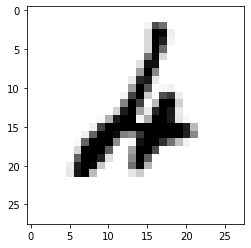

--------------------------------------------------
The real number was 2 and we predicted 7
And this is the image:


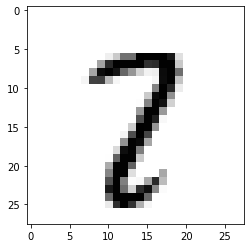

--------------------------------------------------
The real number was 5 and we predicted 3
And this is the image:


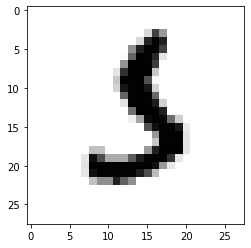

--------------------------------------------------
The real number was 6 and we predicted 0
And this is the image:


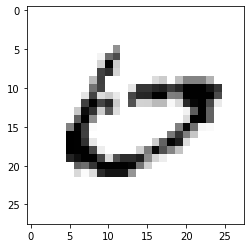

--------------------------------------------------
The real number was 4 and we predicted 9
And this is the image:


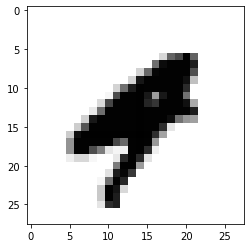

--------------------------------------------------
The real number was 9 and we predicted 8
And this is the image:


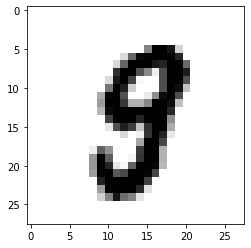

--------------------------------------------------


In [19]:
# Let's check some of the test samples we misclassified and see if they make sense:

MISCLASSIF_TO_CHECK = 10

index=0
misclassif_checked = 0

for r, p in zip(test_classes, pred_classes):
    if r!=p:
        misclassif_checked+=1
        print('The real number was', r, 'and we predicted',p)
        got_wrong = test_X[index]
        plt.imshow(got_wrong, cmap=plt.cm.binary)
        print('And this is the image:')
        plt.show()
        print('--------------------------------------------------')
    if misclassif_checked == MISCLASSIF_TO_CHECK:
        break
    index += 1

As you can see, this Deep Learning classifier is working great to recognise those images and discover which digit they represent.

And most of the images that we got wrong actually makes sense: Even us as humans might doubt of what number is there written.

It makes sense that the classes it has confused the most are the number 9 with the number 4 (similar hand-written shape), although those were just 11 times in my execution.

## Learning questions:

This is your playground. Enjoy.

Add layers, add neurons, change the number of epochs, try SGD, ...

What is the highest testing accuracy you can achieve? Send it to me!